In [7]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 628.0 kB/s eta 0:00:14
   -- ------------------------------------- 0.5/8.7 MB 628.0 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.7 MB 642.7 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/8.7 MB 662.8 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/8.7 MB 662.8 kB/s eta 0:00:12
   ------ --------------------------------- 1.3/8.7 MB 687.4 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/8.7 MB 687.4 kB/s eta 0:00:11
   ------- -------------------------------- 1.6/8.7 MB 711.7 kB/s eta 0:00:11
   -------- -------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
def draw_digit(Img, digit_true, digit_pred = ''):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (28,28)))
    plt.text(0, 27, str(digit_true), color = 'b')
    plt.text(0, 5, str(digit_pred), color = 'r')
    plt.set_cmap('binary')

In [43]:
def show_confusion_matrux(y_test, y_pred, label=''):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [46]:
def print_classification_report(y_test, y_pred):
    print(classification_report(y_test, y_pred))

In [64]:
def show_mistakes_on_predictions(x_test, y_test, y_pred):

    error_indices = np.where(y_test != y_pred)[0]
    
    if len(error_indices) == 0:
        print("Нет ошибок для отображения!")
        return
    else:
        print(f"Найдено {len(error_indices)} ошибок предсказания")

    n_errors = len(error_indices)
    n_cols = 10
    n_rows = (n_errors + n_cols - 1) // n_cols
    
    plt.figure(figsize=(n_cols, n_rows))
    
    for counter, error_idx in enumerate(error_indices, 1):
        if counter > 100:
            break
            
        plt.subplot(n_rows, n_cols, counter)
        Img = x_test[error_idx]
        dig_pred = y_pred[error_idx]
        dig_true = y_test[error_idx]
        
        draw_digit(Img, dig_true, dig_pred)
    
    plt.show()

In [9]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
y = y.astype('int8')

In [13]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


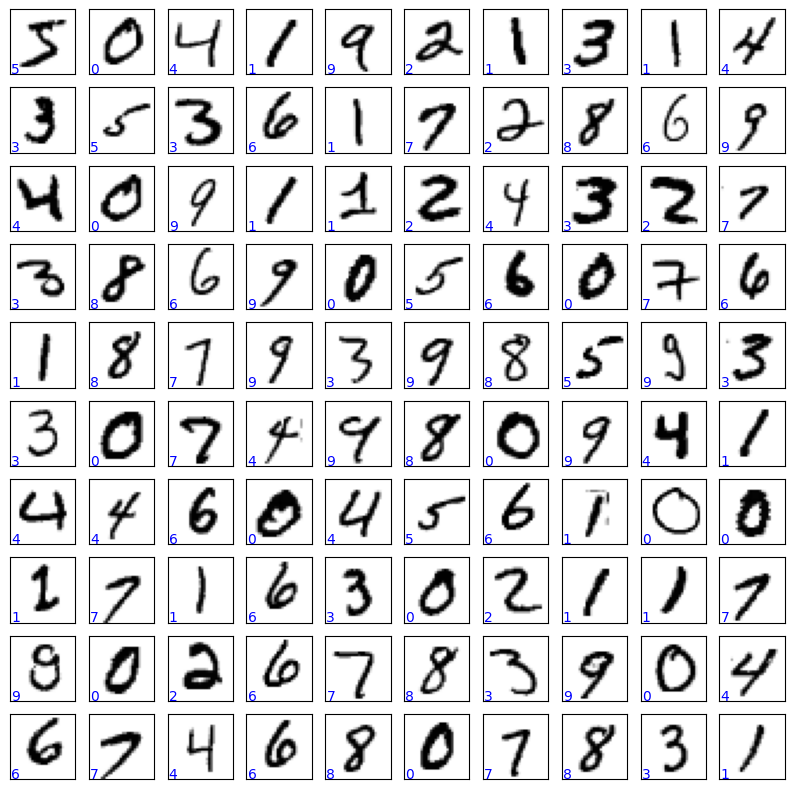

In [12]:
count_of_digits = 10
plt.figure(figsize=(count_of_digits, count_of_digits))
for i in range(0, count_of_digits * 10):
    plt.subplot(10, 10, i + 1)
    draw_digit(X[i, :], y[i])

In [14]:
N_test = 10000
N_train = X.shape[0] - N_test

print(N_test)
print(N_train)

10000
60000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=N_train, test_size=N_test, stratify=y, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [19]:
model_knn = KNeighborsClassifier(n_neighbors=7, p=1)
model_knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


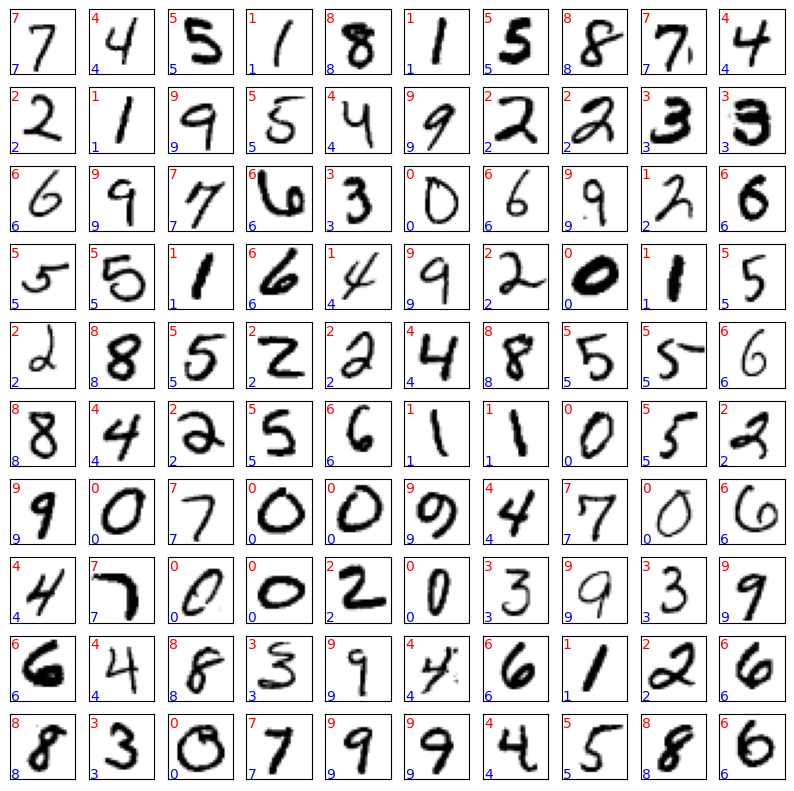

In [34]:
plt.figure(figsize=(count_of_digits, count_of_digits))
for i in range(0, count_of_digits * 10):
    plt.subplot(10, 10, i + 1)
    Img = X_test[i, ]
    dig_true = y_test[i]
    dig_pred = model_knn.predict([Img])[0]
    draw_digit(Img, dig_true, dig_pred)

In [35]:
y_test_predict = model_knn.predict(X_test)

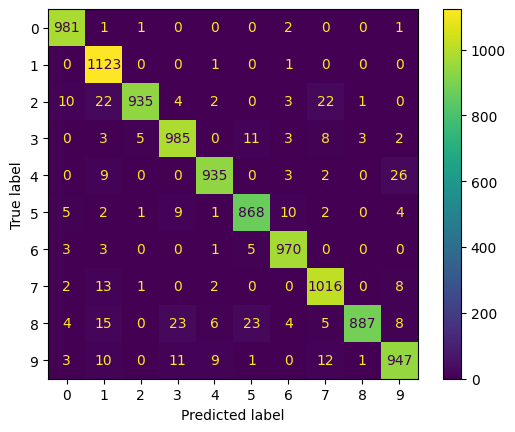

In [44]:
show_confusion_matrux(y_pred=y_test_predict, y_test=y_test)

In [48]:
print_classification_report(y_test, y_test_predict)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       986
           1       0.94      1.00      0.97      1125
           2       0.99      0.94      0.96       999
           3       0.95      0.97      0.96      1020
           4       0.98      0.96      0.97       975
           5       0.96      0.96      0.96       902
           6       0.97      0.99      0.98       982
           7       0.95      0.98      0.96      1042
           8       0.99      0.91      0.95       975
           9       0.95      0.95      0.95       994

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



Найдено 353 ошибок предсказания


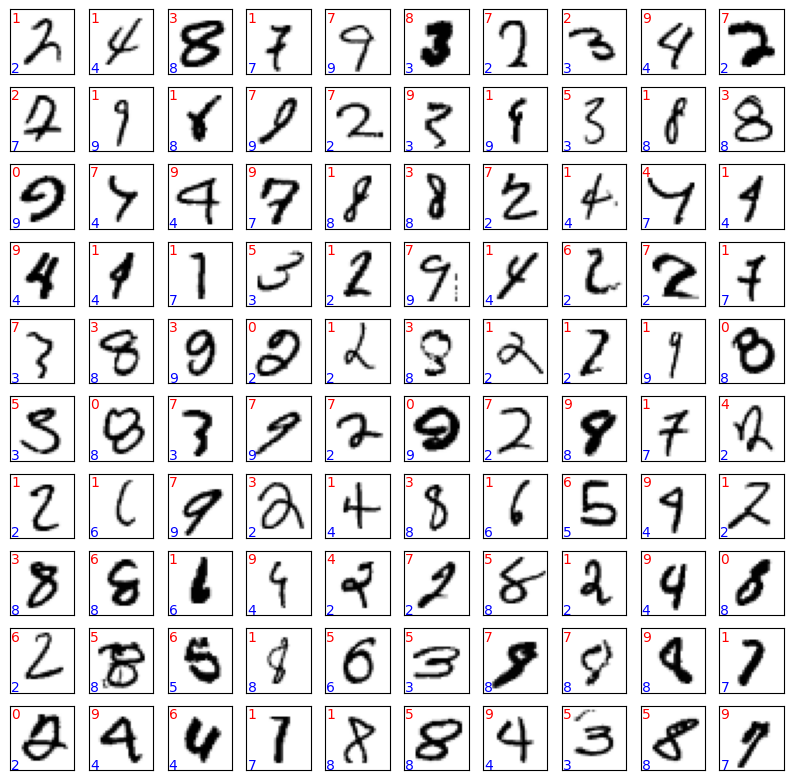

In [65]:
show_mistakes_on_predictions(X_test, y_test, y_test_predict)

In [78]:
model_logistic_regression = LogisticRegression(max_iter=500)
model_logistic_regression.fit(X_train, y_train)

c:\Users\MypkaXD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [79]:
y_test_predict_logistic_regression = model_logistic_regression.predict(X_test)

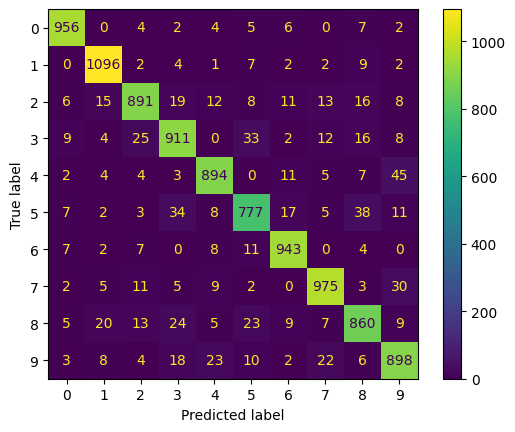

In [80]:
show_confusion_matrux(y_pred=y_test_predict_logistic_regression, y_test=y_test)

In [81]:
print_classification_report(y_test, y_test_predict_logistic_regression)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       986
           1       0.95      0.97      0.96      1125
           2       0.92      0.89      0.91       999
           3       0.89      0.89      0.89      1020
           4       0.93      0.92      0.92       975
           5       0.89      0.86      0.87       902
           6       0.94      0.96      0.95       982
           7       0.94      0.94      0.94      1042
           8       0.89      0.88      0.89       975
           9       0.89      0.90      0.89       994

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Найдено 799 ошибок предсказания


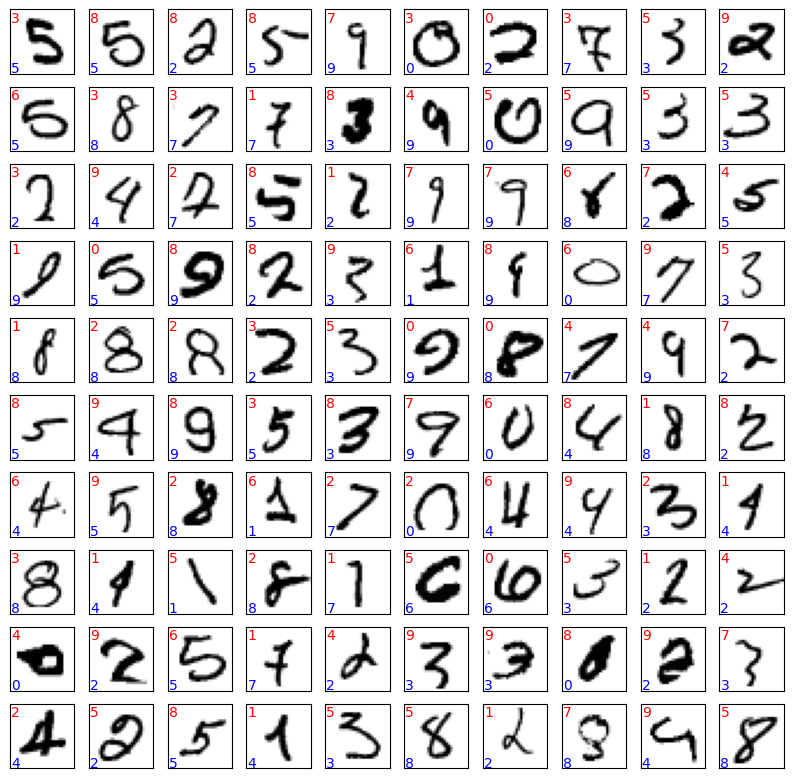

In [82]:
show_mistakes_on_predictions(X_test, y_test, y_test_predict_logistic_regression)

In [73]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [74]:
y_test_predict_tree = model_tree.predict(X_test)

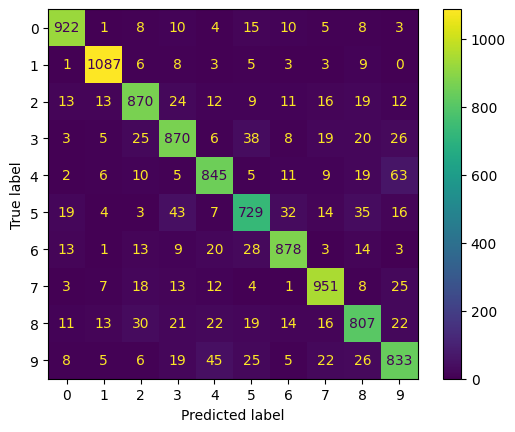

In [75]:
show_confusion_matrux(y_pred=y_test_predict_tree, y_test=y_test)

In [76]:
print_classification_report(y_test, y_test_predict_tree)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       986
           1       0.95      0.97      0.96      1125
           2       0.88      0.87      0.88       999
           3       0.85      0.85      0.85      1020
           4       0.87      0.87      0.87       975
           5       0.83      0.81      0.82       902
           6       0.90      0.89      0.90       982
           7       0.90      0.91      0.91      1042
           8       0.84      0.83      0.83       975
           9       0.83      0.84      0.83       994

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Найдено 1208 ошибок предсказания


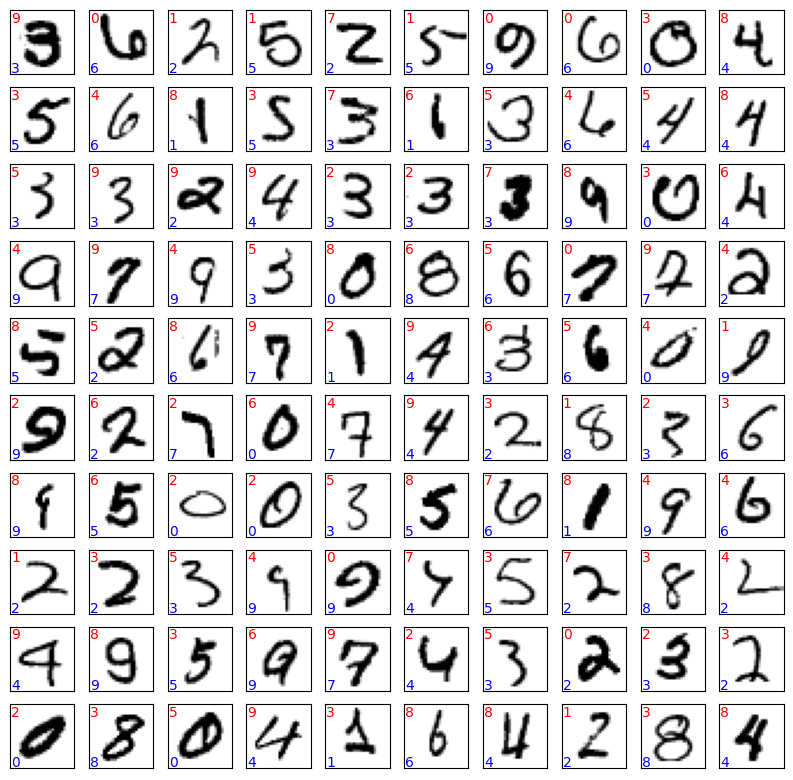

In [77]:
show_mistakes_on_predictions(X_test, y_test, y_test_predict_tree)

In [86]:
models_name = ['KNN', 'LogisticRegression', 'Tree']
models = {'KNN' : model_knn, 'LogisticRegression' : model_logistic_regression, 'Tree' : model_tree}
models_prediction_test = {'KNN' : y_test_predict, 'LogisticRegression' : y_test_predict_logistic_regression, 'Tree' : y_test_predict_tree}

In [89]:
data_of_compare = []

In [90]:
for current_model in models_name:
    current_accuracy = accuracy_score(y_test, models_prediction_test[current_model])
    current_precision = precision_score(y_test, models_prediction_test[current_model], average='weighted', zero_division=0)
    current_recall = recall_score(y_test, models_prediction_test[current_model], average='weighted', zero_division=0)
    current_f1 = f1_score(y_test, models_prediction_test[current_model], average='weighted', zero_division=0)

    data_of_compare.append({'Model' : current_model, 'Accuracy' : current_accuracy, 'Precisionn' : current_precision, 'Recall' : current_recall, 'F1 Score' : current_f1})

In [92]:
display(data_of_compare)

[{'Model': 'KNN',
  'Accuracy': 0.9647,
  'Precisionn': 0.9653640676513442,
  'Recall': 0.9647,
  'F1 Score': 0.9646090865197388},
 {'Model': 'LogisticRegression',
  'Accuracy': 0.9201,
  'Precisionn': 0.9199036039938264,
  'Recall': 0.9201,
  'F1 Score': 0.9199100134062337},
 {'Model': 'Tree',
  'Accuracy': 0.8792,
  'Precisionn': 0.8789116093972682,
  'Recall': 0.8792,
  'F1 Score': 0.8790197357182628}]

In [94]:
accuracy_scores = np.array([data_of_compare[i]['Accuracy'] for i in range(0, len(data_of_compare))])

In [96]:
print(accuracy_scores)

[0.9647 0.9201 0.8792]


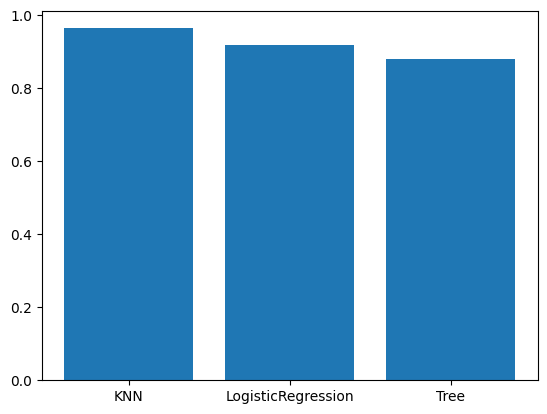

In [97]:
plt.bar(models_name, accuracy_scores)
plt.show()